In [1]:
# Import necessary libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')
from src.oil_analysis_utils import load_and_process_data, analyze_time_series,load_and_process_data,analyze_time_series
from src.oil_analysis_utils import perform_granger_causality, calculate_rolling_correlations,load_economic_indicators
%matplotlib inline

In [2]:
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
# Load and verify the data
df = load_and_process_data('../data/BrentOilPrices.csv')

Sample of dates before conversion:
0    20-May-87
1    21-May-87
2    22-May-87
3    25-May-87
4    26-May-87
Name: Date, dtype: object

Unique date formats in the dataset:
['20-May-87' '21-May-87' '22-May-87' '25-May-87' '26-May-87']
First attempt failed with error: time data "Apr 22, 2020" doesn't match format "%d-%b-%y", at position 8360. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


c:\Users\hp\Documents\BrentOilPriceAnalysis\notebook\..\src\oil_analysis_utils.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [4]:
# Display the first few rows and basic information
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Price,Returns,Volatility
Date,,,
1987-05-20,18.63,NaN,NaN
1987-05-21,18.45,-0.009662,NaN
1987-05-22,18.55,0.005420,NaN
1987-05-25,18.60,0.002695,NaN
1987-05-26,18.63,0.001613,NaN


In [5]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       9011 non-null   float64
 1   Returns     9010 non-null   float64
 2   Volatility  8991 non-null   float64
dtypes: float64(3)
memory usage: 281.6 KB


None

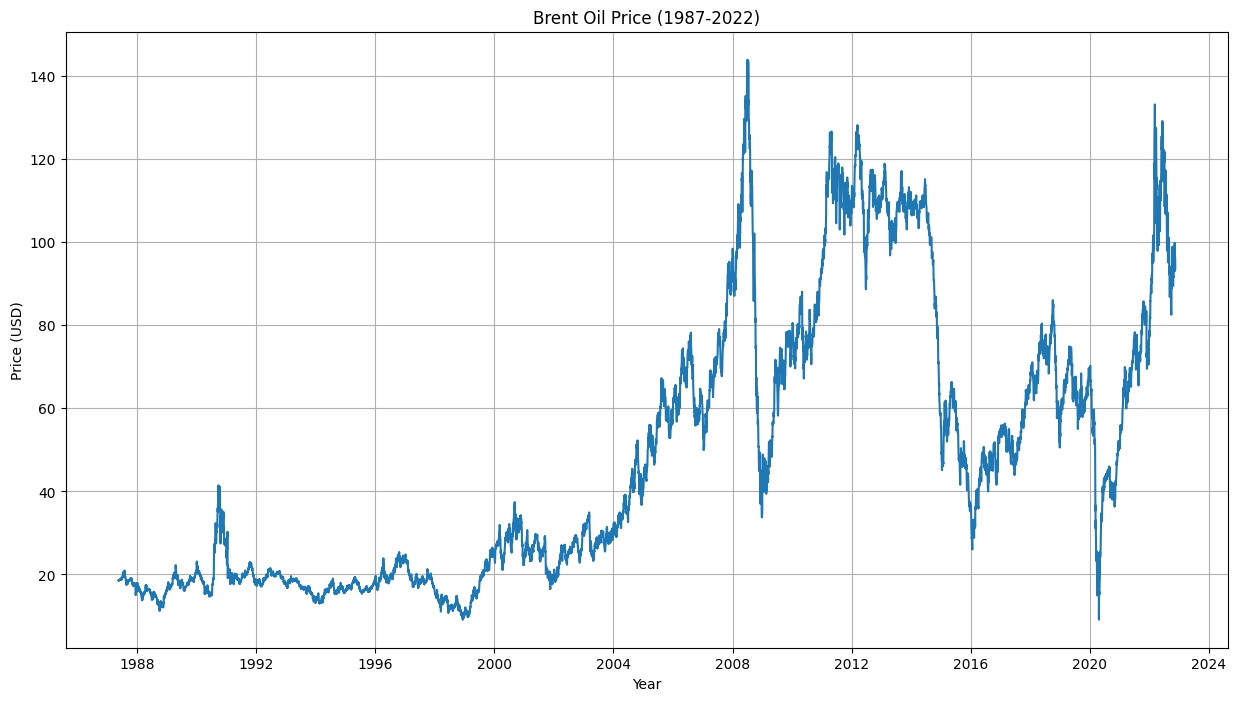

In [6]:
# Plot the oil price time series
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Price'])
plt.title('Brent Oil Price (1987-2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Frequency')

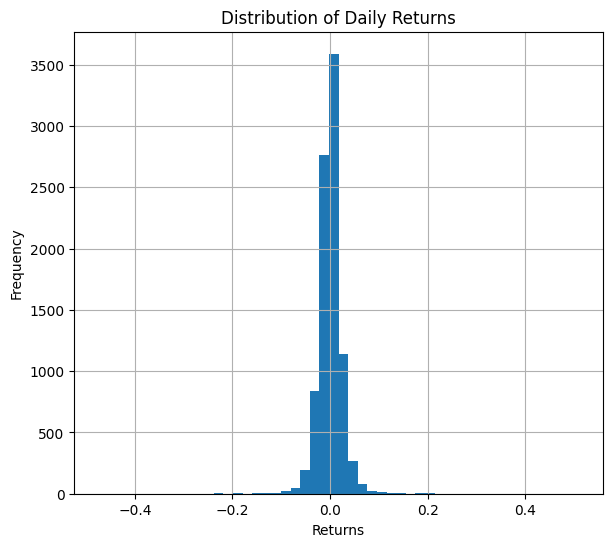

In [7]:
# Plot returns distribution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df['Returns'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

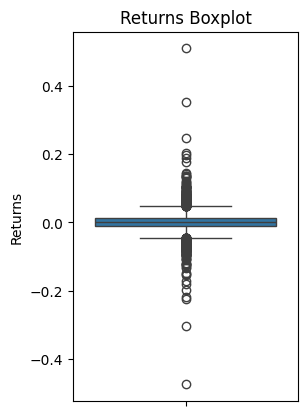

In [8]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Returns'])
plt.title('Returns Boxplot')
plt.show()

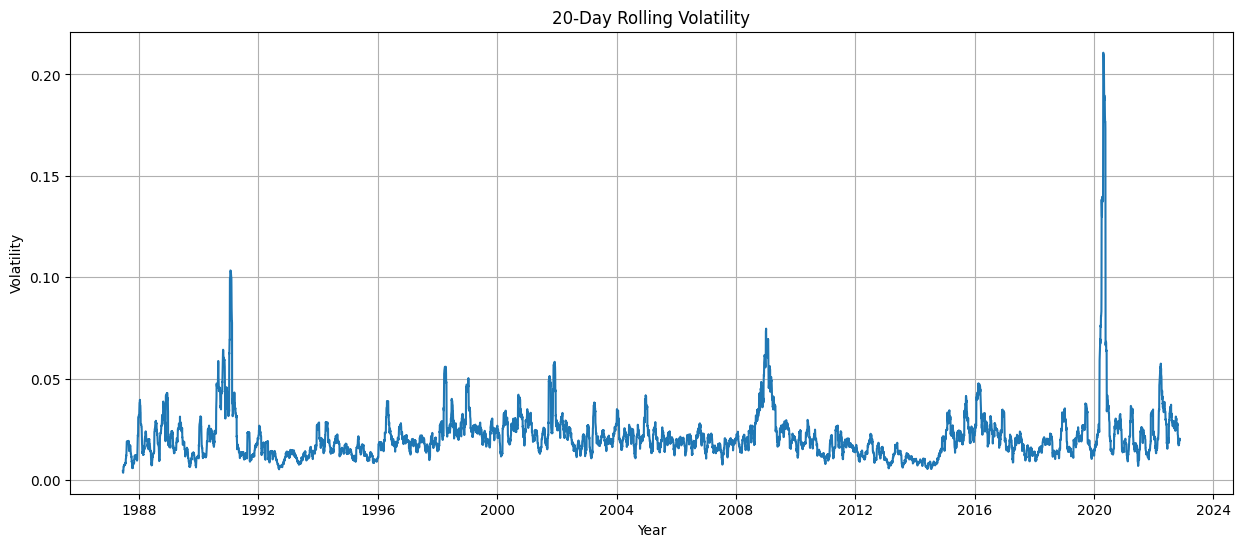

In [9]:
# Plot volatility over time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Volatility'])
plt.title('20-Day Rolling Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

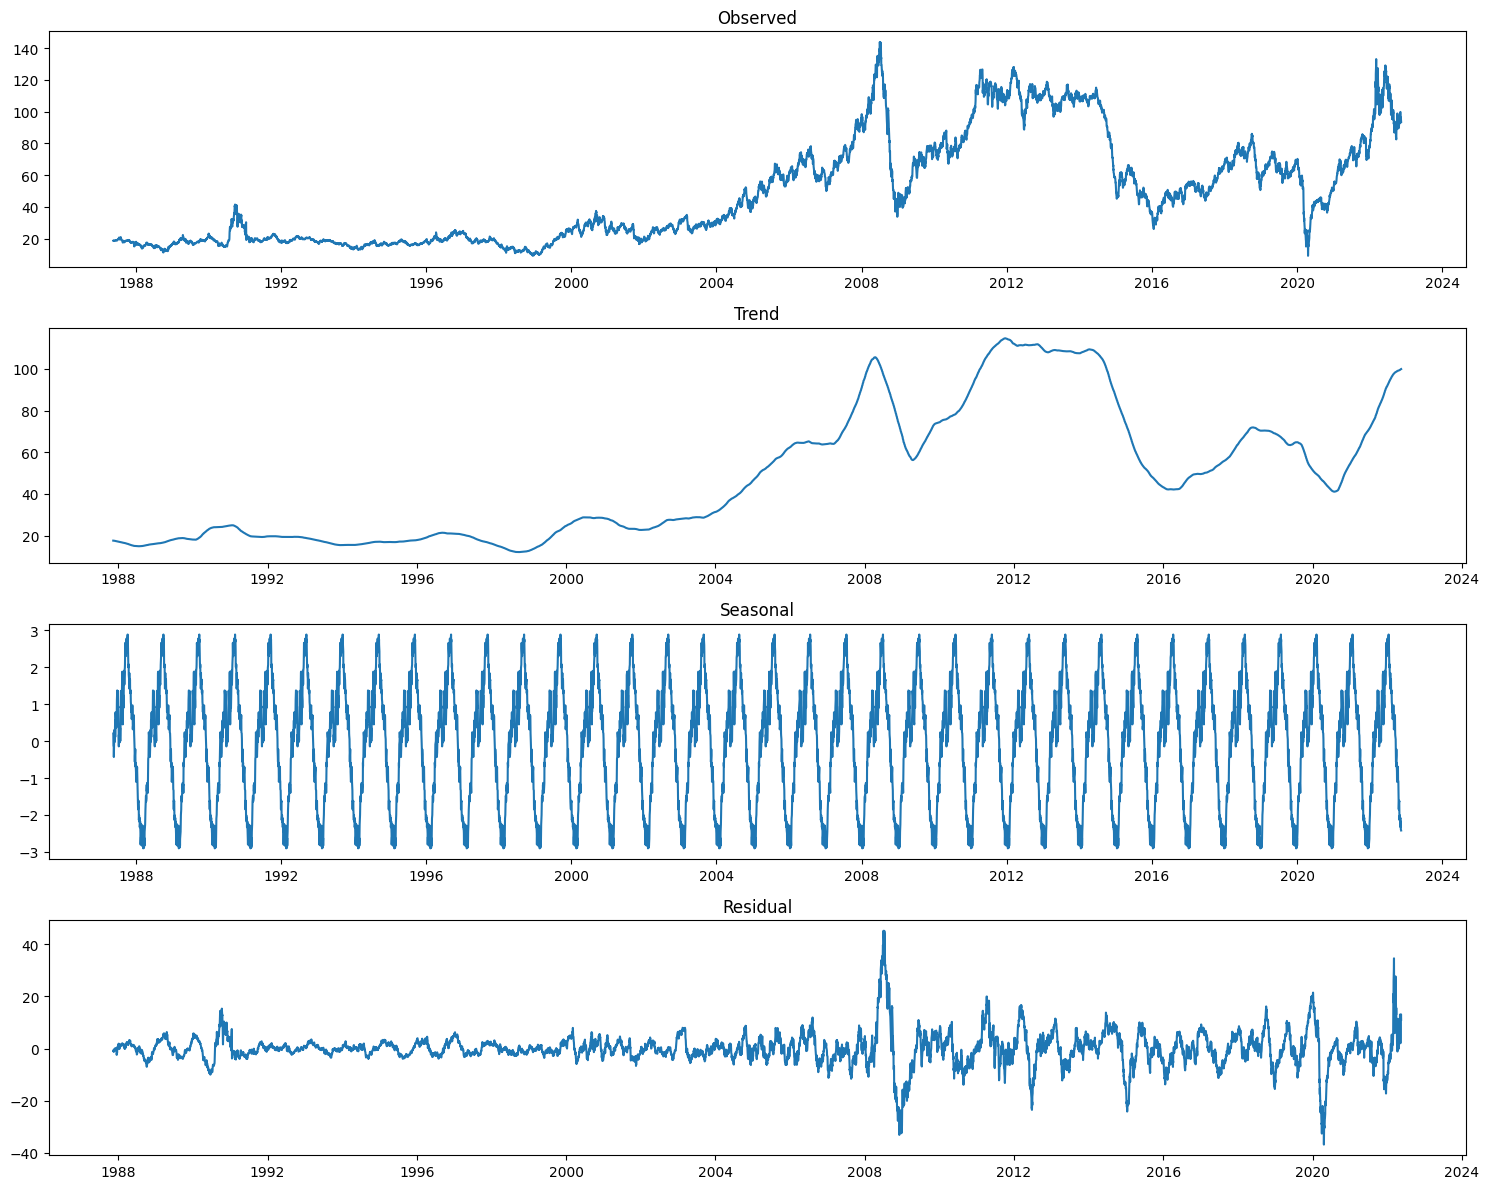

In [10]:
# Perform time series decomposition
decomposition, adf_result, stats = analyze_time_series(df)
# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
ax1.plot(decomposition.observed)
ax1.set_title('Observed')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

In [11]:
# Print statistical results
print("Summary Statistics:")
display(stats)

Summary Statistics:


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64